In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [84]:

df_train = pd.read_csv('/C-SSD/fachel/arthur/TRAB-AM-01/heartTrain.csv')
df_test = pd.read_csv('/C-SSD/fachel/arthur/TRAB-AM-01/heartTeste.csv')

In [85]:
mediana_colesterol = df_train['Cholesterol'].median()

In [86]:
y_train_full = df_train['HeartDisease']
X_train_full = df_train.drop('HeartDisease', axis=1)
X_test_final = df_test.drop('HeartDisease', axis=1, errors='ignore')
X_train_full['Cholesterol'].fillna(mediana_colesterol, inplace=True)

/tmp/ipykernel_3139012/2447192199.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_full['Cholesterol'].fillna(mediana_colesterol, inplace=True)


In [87]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

X_train_Standard = pd.get_dummies(X_train_full, columns=categorical_cols, drop_first=True)
X_test_Standard = pd.get_dummies(X_test_final, columns=categorical_cols, drop_first=True)
X_test_Standard = X_test_Standard.reindex(columns=X_train_Standard.columns, fill_value=0)


In [88]:

standarScaler = StandardScaler()
X_train_Standard[numeric_cols] = standarScaler.fit_transform(X_train_Standard[numeric_cols])
X_test_Standard[numeric_cols] = standarScaler.transform(X_test_Standard[numeric_cols])

In [89]:
X_train_std, X_val_std, y_train_std, y_val_std = train_test_split(
    X_train_Standard, y_train_full, test_size=0.3, random_state=42, stratify=y_train_full
)

In [90]:
model = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5, min_samples_split=10)


In [ ]:
model.fit(X_train_std, y_train_std)
y_pred_std = model.predict(X_val_std)
accuracy_Std = accuracy_score(y_val_std, y_pred_std)
print(f"Acurácia do modelo com Standard: {accuracy_Std:.4f}")


Acurácia do modelo com Standard: 0.8370


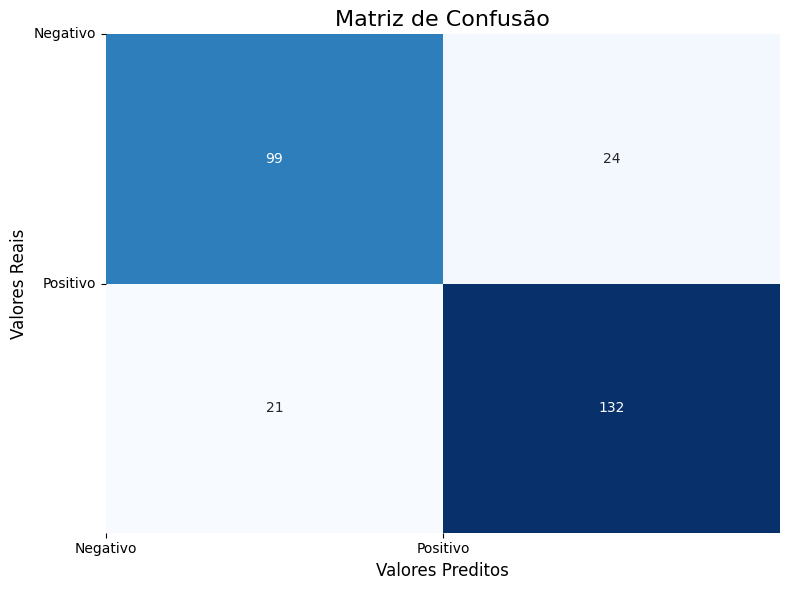

In [94]:
cm = confusion_matrix(y_val_std, y_pred_std)

# b) Criar o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# c) Adicionar rótulos para melhor compreensão
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Valores Preditos', fontsize=12)
plt.ylabel('Valores Reais', fontsize=12)

# Rotulando TP, TN, FP, FN
class_names = ['Negativo', 'Positivo']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names, rotation=0)

# Para maior clareza, você pode adicionar anotações personalizadas.
# Aqui está a estrutura da matriz de confusão:
# TN | FP
# FN | TP


plt.tight_layout()
plt.show()